In [1]:
import pandas as pd
import numpy as np
import re
import emoji
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

import torch



In [2]:
df1 = pd.read_csv("Tweet_Asterix.csv", sep = ";", usecols= ["created_at", "id", "text"])
print("Shape : ", df1.shape)
print("Colonnes : ", df1.columns)
df1.head()

Shape :  (1387, 3)
Colonnes :  Index(['created_at', 'id', 'text'], dtype='object')


,created_at,id,text
0,2023-02-08 13:46:53+00:00,1623317443903987713,Très bon retour spectateurs Allociné pour #ali...
1,2023-02-08 13:42:54+00:00,1623316442069233664,"J’vous jure c’est ni une aventure, ni une comé..."
2,2023-02-08 13:37:09+00:00,1623314995378356230,📚 Dans les librairies\nÀ découvrir dès aujourd...
3,2023-02-08 13:21:26+00:00,1623311040099262466,"@CarrefourFrance Bonjour, je participe pour te..."
4,2023-02-08 12:58:20+00:00,1623305227460919297,@CarrefourFrance #AsterixEtObelixLEmpireDuMili...


In [3]:
# We remove hours
def date_format(df):
    df["created_at"] = df["created_at"].str[:10]
    df = df.rename(columns = { "created_at" :"Date" })
    return df

df1 = date_format(df1)
df1.head()

,Date,id,text
0,2023-02-08,1623317443903987713,Très bon retour spectateurs Allociné pour #ali...
1,2023-02-08,1623316442069233664,"J’vous jure c’est ni une aventure, ni une comé..."
2,2023-02-08,1623314995378356230,📚 Dans les librairies\nÀ découvrir dès aujourd...
3,2023-02-08,1623311040099262466,"@CarrefourFrance Bonjour, je participe pour te..."
4,2023-02-08,1623305227460919297,@CarrefourFrance #AsterixEtObelixLEmpireDuMili...


In [4]:
#We check duplicata :

def check_duplicate(df):
    return df.duplicated().any()

check_duplicate(df1)

False

In [5]:
x = df1.iloc[1386,2]
x

"#AsterixEtObelixLEmpireDuMilieu\n#GuillaumeCanetEstMort\n#Urgence !!! Suite aux retours catastrophique des spectateurs et de la critique des premières séances #Cinema du nouveau film #Asterix. La production et les distributeurs viennent d'apprendre la mort de #GuillaumeCanet 😂 https://t.co/BHA8y5kTpo"

In [6]:
def text_processing(x):
    x = x.lower()
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"\U0001fae3", "", x)
    x = re.sub("@[A-Za-z0-9_]+","", x)
    x = re.sub("#[A-Za-z0-9_]+","", x)
    x = re.sub(r"-M-", "", x)
    x = re.sub(r"\n", " ", x)
    x = re.sub(r"&amp;", "et", x)
    x = re.sub(r"www.\S+", "", x)
    x = emoji.replace_emoji(x)
    return x

In [7]:
df1["clean_text"] = df1["text"].apply(text_processing)
df1.head()

,Date,id,text,clean_text
0,2023-02-08,1623317443903987713,Très bon retour spectateurs Allociné pour #ali...,très bon retour spectateurs allociné pour mal...
1,2023-02-08,1623316442069233664,"J’vous jure c’est ni une aventure, ni une comé...","j’vous jure c’est ni une aventure, ni une comé..."
2,2023-02-08,1623314995378356230,📚 Dans les librairies\nÀ découvrir dès aujourd...,dans les librairies à découvrir dès aujourd'h...
3,2023-02-08,1623311040099262466,"@CarrefourFrance Bonjour, je participe pour te...","bonjour, je participe pour tenter de gagner u..."
4,2023-02-08,1623305227460919297,@CarrefourFrance #AsterixEtObelixLEmpireDuMili...,merci !


In [8]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

print("Running Sentimental Analysis")

for i in df1.index:
    review = tb(df1.loc[i, "clean_text"]).sentiment[0]
    
    if (review > 0):
        df1.loc[i,"Sentiment"] = "Positive"
    elif (review < 0):
        df1.loc[i,"Sentiment"] = "Negative"
    else:
        df1.loc[i,"Sentiment"] = "Neutral"

df1

Running Sentimental Analysis


,Date,id,text,clean_text,Sentiment
0,2023-02-08,1623317443903987713,Très bon retour spectateurs Allociné pour #ali...,très bon retour spectateurs allociné pour mal...,Positive
1,2023-02-08,1623316442069233664,"J’vous jure c’est ni une aventure, ni une comé...","j’vous jure c’est ni une aventure, ni une comé...",Neutral
2,2023-02-08,1623314995378356230,📚 Dans les librairies\nÀ découvrir dès aujourd...,dans les librairies à découvrir dès aujourd'h...,Positive
3,2023-02-08,1623311040099262466,"@CarrefourFrance Bonjour, je participe pour te...","bonjour, je participe pour tenter de gagner u...",Positive
4,2023-02-08,1623305227460919297,@CarrefourFrance #AsterixEtObelixLEmpireDuMili...,merci !,Positive
...,...,...,...,...,...
1382,2023-02-01,1620790185536651264,⭐️ÉTOILES DE LA SEMAINE⭐️\n\n#AsterixEtObelixL...,étoiles de la semaine,Neutral
1383,2023-02-01,1620788985651134464,La bande originale d' #AstérixEtObélixLEmpireD...,la bande originale d' érixetobélixlempiredumil...,Positive
1384,2023-02-01,1620788185520549888,@SarahRempe @ctmieuxavant33 @destinationcine @...,je crois que c’était un reproche des ayant...,Positive
1385,2023-02-01,1620782556986896384,#Asterixetobelixlempiredumilieu j'ai tenu 40 m...,j'ai tenu 40 minutes devant cette daube ! per...,Negative


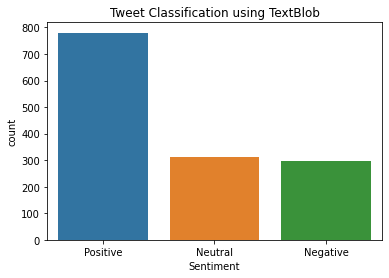

In [30]:
ax = sns.countplot(x = df1["Sentiment"])
ax.set_title("Tweet Classification using TextBlob")
plt.show()


In [10]:
text = df1.loc[1382, ["text" ]]
text

text    ⭐️ÉTOILES DE LA SEMAINE⭐️\n\n#AsterixEtObelixL...
Name: 1382, dtype: object

# CamenBERT

In [25]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
# Load the tokenizer

tokenizer = AutoTokenizer.from_pretrained("Monsia/camembert-fr-covid-tweet-sentiment-classification")
tokenizer

CamembertTokenizerFast(name_or_path='Monsia/camembert-fr-covid-tweet-sentiment-classification', vocab_size=32005, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False), 'additional_special_tokens': ['<s>NOTUSED', '</s>NOTUSED']})

In [21]:
# Load Model

model = AutoModelForSequenceClassification.from_pretrained("Monsia/camembert-fr-covid-tweet-sentiment-classification")
model

CamembertForSequenceClassification(
  (roberta): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0): CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
     

In [20]:
text = df1["text"].to_list()

In [28]:
nlp_topic_classif = pipeline("text-classification" ,model = model, tokenizer = tokenizer)

In [49]:
pred = nlp_topic_classif("tchai on est morts. on va se faire vacciner")
print(pred)

[{'label': 'negatif', 'score': 0.9659296274185181}]


In [52]:
pred_cl = pred[0]
type(pred_cl)
pred_cl["label"]

'negatif'

In [54]:
def Bert_Sentiment(x):
    pred = nlp_topic_classif(x)
    pred_cl = pred[0]
    pred_cl = pred_cl["label"]
    return pred_cl

In [55]:
df1["Bert_Sentimental"] = df1["clean_text"].apply(Bert_Sentiment)

In [60]:
pd.options.display.max_colwidth = 500

In [64]:
df1

,Date,id,text,clean_text,Sentiment,Bert_Sentimental
0,2023-02-08,1623317443903987713,Très bon retour spectateurs Allociné pour #alibi2 malgré une presse timorée\nÇa change de #AsterixEtObelixLEmpireDuMilieu 🥹 https://t.co/Lv77nWlhWZ,très bon retour spectateurs allociné pour malgré une presse timorée ça change de,Positive,negatif
1,2023-02-08,1623316442069233664,"J’vous jure c’est ni une aventure, ni une comédie\n#AsterixEtObelixLEmpireDuMilieu #Asterix https://t.co/2DBxDKb4ln","j’vous jure c’est ni une aventure, ni une comédie",Neutral,negatif
2,2023-02-08,1623314995378356230,"📚 Dans les librairies\nÀ découvrir dès aujourd'hui : l'album illustré Astérix &amp; Obélix – L’Empire du milieu, adapté du scénario du film de Guillaume Canet !\n#AstérixEtObélix #asterixetobelixlempiredumilieu\n\nhttps://t.co/WX663iRi0X https://t.co/RIzyPb7v56","dans les librairies à découvrir dès aujourd'hui : l'album illustré astérix et obélix – l’empire du milieu, adapté du scénario du film de guillaume canet ! érixetobélix",Positive,positif
3,2023-02-08,1623311040099262466,"@CarrefourFrance Bonjour, je participe pour tenter de gagner une boîte de Playmobil le banquet d'Astérix #AsterixEtObelixLEmpireDuMilieu 🍀🤞. Merci @CarrefourFrance pour ce superbe #CONCOURS 😍🤩. Bonne journée et bonne chance à tous","bonjour, je participe pour tenter de gagner une boîte de playmobil le banquet d'astérix . merci pour ce superbe . bonne journée et bonne chance à tous",Positive,positif
4,2023-02-08,1623305227460919297,@CarrefourFrance #AsterixEtObelixLEmpireDuMilieu merci !,merci !,Positive,neutre
...,...,...,...,...,...,...
1382,2023-02-01,1620790185536651264,⭐️ÉTOILES DE LA SEMAINE⭐️\n\n#AsterixEtObelixLEmpireDuMilieu #LaMontagne #Aftersun #KnockAtTheCabin #LePireVoisinDuMonde #UnPetitFrere #AmoreMio https://t.co/g5nNJS3aQj,étoiles de la semaine,Neutral,neutre
1383,2023-02-01,1620788985651134464,"La bande originale d' #AstérixEtObélixLEmpireDuMilieu composée par @M_Chedid est disponible sur toutes les plateformes !\n\nInclus le titre ""Ils sont fous ces humains!"" feat. @bigfloetoli 🕺 https://t.co/yFEyXNVpxY","la bande originale d' érixetobélixlempiredumilieu composée par est disponible sur toutes les plateformes ! inclus le titre ""ils sont fous ces humains!"" feat.",Positive,negatif
1384,2023-02-01,1620788185520549888,"@SarahRempe @ctmieuxavant33 @destinationcine @Ecran_Total Je crois que c’était un reproche des ayant-droit à l’Astérix de Chabat (qu’on adore tous), de s’être trop éloigné de la BD. L’effort ici est évident. La carrure de Gilles Lellouche est impressionnante, il colle parfaitement à Obélix.\n#AsterixEtObelixLEmpireDuMilieu","je crois que c’était un reproche des ayant-droit à l’astérix de chabat (qu’on adore tous), de s’être trop éloigné de la bd. l’effort ici est évident. la carrure de gilles lellouche est impressionnante, il colle parfaitement à obélix.",Positive,negatif
1385,2023-02-01,1620782556986896384,#Asterixetobelixlempiredumilieu j'ai tenu 40 minutes devant cette daube ! Personne ne rigole dans la salle ! Une catastrophe ce film a ne surtout pas aller voir !,j'ai tenu 40 minutes devant cette daube ! personne ne rigole dans la salle ! une catastrophe ce film a ne surtout pas aller voir !,Negative,negatif


In [65]:
df1.loc[0,:]

Date                                                                                                                                                         2023-02-08
id                                                                                                                                                  1623317443903987713
text                Très bon retour spectateurs Allociné pour #alibi2 malgré une presse timorée\nÇa change de #AsterixEtObelixLEmpireDuMilieu 🥹 https://t.co/Lv77nWlhWZ
clean_text                                                                         très bon retour spectateurs allociné pour  malgré une presse timorée ça change de   
Sentiment                                                                                                                                                      Positive
Bert_Sentimental                                                                                                                                                